 # <center> Digit Recognition using Ensemble Method </center>

***

### Name : Bhushan Dive
### Roll no : 42
### Section : A 

***

## What is Handwritten Digit Recognition?

The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

***

## MNIST database

The **MNIST database** Modified National Institute of Standards and Technology database is a large database of handwritten digits that is commonly used for training various image processing systems.

The MNIST Dataset is a collection of 28 * 28 pixel handwritten grayscale images of numbers from 0 to 9 in different styles.

The MNIST Dataset contains 60,000 training images and 10,000 testing images. 

***

## Naive Bayes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
print('Success')

Success


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Loading MNIST data and splitting it in train test 
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
# test data is of 60,000 images and 784 is the number of pixel values in an imaage ie 28 * 28

In [4]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
unique, counts = np.unique(y_train, return_counts=True)

In [7]:
dict(zip(unique, counts))

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [8]:
x_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

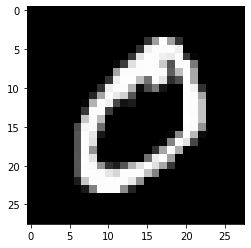

In [9]:
plt.imshow(x_train[1].reshape((28,28)), cmap = 'gray')
plt.show()

In [10]:
naive_bayes_model = GaussianNB()
#Building the Model

In [11]:
fit_model = naive_bayes_model.fit(x_train, y_train)

In [12]:
predictions = fit_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]


In [13]:
#Diagonal elements are true positives

In [14]:
# Taking sum of all TP 
def diagonal_ele_sum(conf_matrix):
    sum = 0
    for i in range(10):
        for j in range(10):
            if (i==j):
                sum += conf_matrix[i,j]
    return sum

In [15]:
sum = diagonal_ele_sum(conf_matrix)
print(sum)
print(f'Accuracy %:{sum/10000}')
# Finding Accuracy of the model

5558
Accuracy %:0.5558


In [16]:
predictions_2 = fit_model.predict(x_train)
conf_matrix_2 = confusion_matrix(y_train, predictions_2)
print(conf_matrix_2)

[[5206    9   33   16    9   13  165    5  356  111]
 [   4 6341   15   33    3   12   74    4  173   83]
 [ 484  152 1786  474   33   37 1443   17 1444   88]
 [ 274  295   49 2277   11   15  268   46 2274  622]
 [ 114   39   49   33 1027   35  483   21 1259 2782]
 [ 525  122   33  125   34  336  273   11 3411  551]
 [  47   92   25    3    4   19 5572    0  148    8]
 [  27   36    9   54   51    8   15 1919  190 3956]
 [  88  722   23   51   19   33   80    6 3802 1027]
 [  30   31   17    7   33    4    4   83  112 5628]]


In [17]:
sum_2 = diagonal_ele_sum(conf_matrix_2)
print(sum_2)
print(f'Accuracy %: {sum_2/60000}')

33894
Accuracy %: 0.5649


In [18]:
# Creating a heatmap of testing dataset

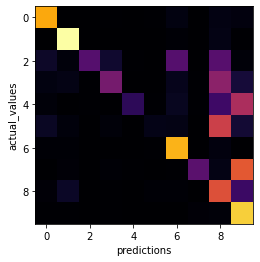

In [19]:
plt.imshow(conf_matrix, cmap='inferno',interpolation='nearest')
plt.xlabel('predictions')
plt.ylabel('actual_values')
plt.show()

In [20]:
# Brighter colors means higher values.

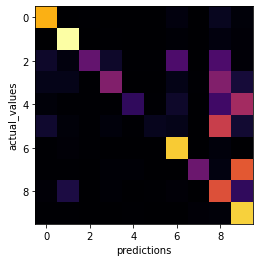

In [21]:
plt.imshow(conf_matrix_2, cmap='inferno',interpolation='nearest')
plt.xlabel('predictions')
plt.ylabel('actual_values')
plt.show()

In [23]:
#heatmap of confusion matrix 2

## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
# Decision tree classifier
print('success')

success


In [26]:
dtc = DecisionTreeClassifier(max_depth=3,random_state=42)

In [27]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [28]:
from sklearn import tree

In [29]:
plt.figure(figsize=(30,10), facecolor ='k')

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

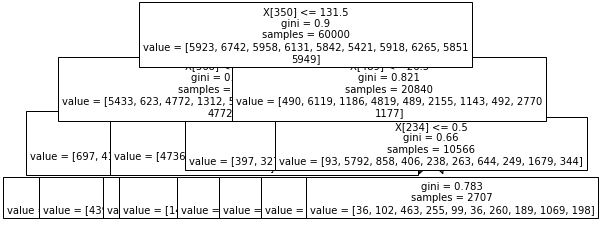

In [33]:
a = tree.plot_tree(dtc,

                   rounded = False,

                   filled = False,

                   fontsize=10)
plt.show()